In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std_dev = None

    def fit_transform(self, X):
        #Step 1: standardize
        self.mean = np.mean(X, axis=0)
        self.std_dev = np.std(X, axis=0) + 1e-8
        X_standardized = (X - self.mean) / self.std_dev

        #Step 2: Covariance matrix
        cov_matrix = np.cov(X_standardized, rowvar=False)

        #Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sorting eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        
        #Select the top eigenvectors (principal components)
        self.components = eigenvectors[:, :self.n_components]

        #Step 5: Project data
        X_reduced = X_standardized.dot(self.components)
        return X_reduced
        
    def inverse_transform(self, X_reduced):
        X_approx = np.dot(X_reduced, self.components.T)
        return (X_approx * self.std_dev) + self.mean

In [3]:
mnist = fetch_openml('mnist_784', version=1,parser='auto')
X = mnist.data.to_numpy() / 255.0
y = mnist.target
X_subset = X[:1000]

Dimension:  (784,)


(-0.5, 27.5, 27.5, -0.5)

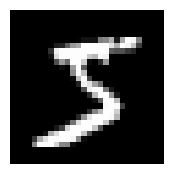

In [4]:
plt.figure(figsize=(6, 2))
plt.imshow(X_subset[0].reshape(28, 28), cmap='gray')
print("Dimension: ", X_subset[0].shape)
plt.axis('off')

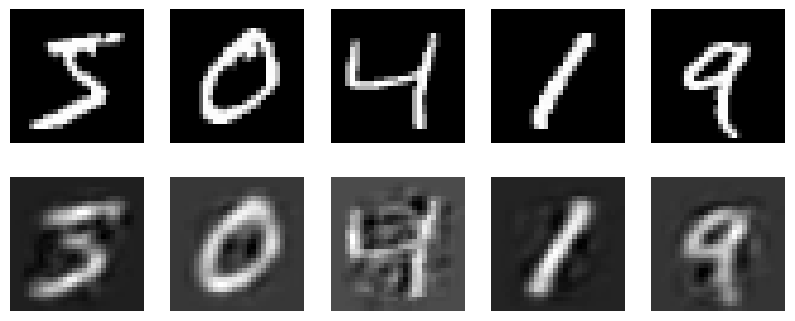

Original Dimension:  (784,)
Reduced Dimension:  (50,)


In [5]:
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X_subset)
X_reconstructed = pca.inverse_transform(X_reduced)

def plot_images(original, reconstructed, n_images=5):
    plt.figure(figsize=(10, 4))
    for i in range(n_images):
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(X_subset, X_reconstructed)
print("Original Dimension: ",X_subset[0].shape)
print("Reduced Dimension: ",X_reduced[0].shape)